In [1]:
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.utils import image_dataset_from_directory

import matplotlib.pyplot as plt

### Test GPUs

In [2]:
print(f"GPUs: {len(tf.config.list_physical_devices('GPU'))}")

GPUs: 2


### Reading the DATA

In [3]:
w_dir = pathlib.Path('/home/antirrabia/Documents/DeepLearnin/DATASETS/CatsVsDogs/cats_vs_dogs_small/')

In [4]:
tr_d = image_dataset_from_directory( 
    w_dir / 'train',
    image_size=(180,180),
    batch_size=32
)

va_d = image_dataset_from_directory( 
    w_dir / 'validation',
    image_size=(180,180),
    batch_size=32
)

te_d = image_dataset_from_directory(
    w_dir / 'test',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Augmentation

In [5]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

### Model

In [6]:
inputs = keras.Input(shape=(180,180,3))

x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x)

x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

### Compile

In [7]:
model.compile( loss="binary_crossentropy",
               optimizer='rmsprop',
               metrics=['accuracy'])

### summary

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

### Training

In [9]:
callbacks = [ 
    keras.callbacks.ModelCheckpoint( 
                                  filepath="CatsVsDogs_UsingAugmentation.keras", 
                                  save_best_only=True, 
                                  monitor="val_loss"
                                    ) 
            ]

history = model.fit( 
    tr_d,
    epochs=100,
    validation_data=va_d,
    callbacks=callbacks
)

Epoch 1/100
63/63 [==============================] - 18s 199ms/step - loss: 0.7415 - accuracy: 0.5095 - val_loss: 0.6919 - val_accuracy: 0.5660
Epoch 2/100
63/63 [==============================] - 11s 181ms/step - loss: 0.6967 - accuracy: 0.5410 - val_loss: 1.2631 - val_accuracy: 0.5020
Epoch 3/100
63/63 [==============================] - 12s 186ms/step - loss: 0.7051 - accuracy: 0.5705 - val_loss: 0.6887 - val_accuracy: 0.5140
Epoch 4/100
63/63 [==============================] - 12s 187ms/step - loss: 0.6877 - accuracy: 0.6160 - val_loss: 0.6399 - val_accuracy: 0.6190
Epoch 5/100
63/63 [==============================] - 12s 190ms/step - loss: 0.6435 - accuracy: 0.6270 - val_loss: 0.6291 - val_accuracy: 0.6400
Epoch 6/100
63/63 [==============================] - 12s 183ms/step - loss: 0.6314 - accuracy: 0.6450 - val_loss: 0.9898 - val_accuracy: 0.5770
Epoch 7/100
63/63 [==============================] - 12s 188ms/step - loss: 0.6176 - accuracy: 0.6555 - val_loss: 0.6105 - val_accuracy:

### Ploting the training stats 

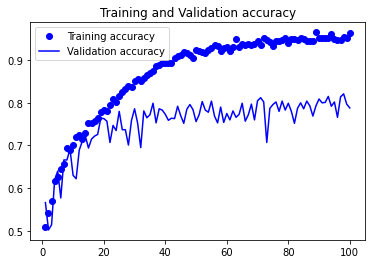

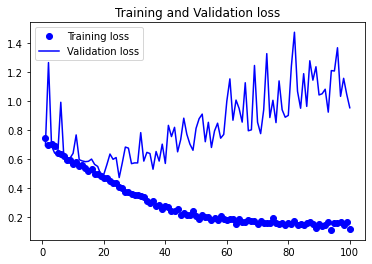

<Figure size 432x288 with 0 Axes>

In [12]:
# Accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

#epochsss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range (1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(), plt.figure();

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend(), plt.figure();

### Model evaluation

In [14]:
te_m = keras.models.load_model('CatsVsDogs_UsingAugmentation.keras')

te_loss, te_acc = te_m.evaluate(te_d)

print(f'Test accuacy: {te_acc:.3f}')

63/63 [==============================] - 1s 15ms/step - loss: 0.5159 - accuracy: 0.7620
Test accuacy: 0.762
